In [20]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [34]:
columns = ['userId', 'movieId', 'rating', 'timestamp']
ratings = pd.read_csv('rating.csv', sep='\t', names=columns)

In [35]:
ratings.head()

,userId,movieId,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [36]:
movies = pd.read_csv('movie.csv')
movies.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [37]:
movies.rename(columns = {'item_id' : 'movieId'}, inplace=True)
movies.head()

,movieId,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [38]:
df = pd.merge(ratings, movies, on='movieId')
df.head()

,userId,movieId,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [39]:
sns.set_style('whitegrid')
%matplotlib inline

In [40]:
df.groupby('title')['rating'].count().sort_values(ascending = False).head()


title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [41]:
average_rating = pd.DataFrame(df.groupby('title')['rating'].mean().sort_values(ascending = False))
average_rating.head()

,rating
title,
They Made Me a Criminal (1939),5.0
Marlene Dietrich: Shadow and Light (1996),5.0
"Saint of Fort Washington, The (1993)",5.0
Someone Else's America (1995),5.0
Star Kid (1997),5.0


In [42]:
average_rating['Number of times rated'] = pd.DataFrame(df.groupby('title')['rating'].count())
average_rating.head(50)

,rating,Number of times rated
title,,
They Made Me a Criminal (1939),5.000000,1
Marlene Dietrich: Shadow and Light (1996),5.000000,1
"Saint of Fort Washington, The (1993)",5.000000,2
Someone Else's America (1995),5.000000,1
Star Kid (1997),5.000000,3
"Great Day in Harlem, A (1994)",5.000000,1
Aiqing wansui (1994),5.000000,1
Santa with Muscles (1996),5.000000,2
Prefontaine (1997),5.000000,3


<AxesSubplot:>

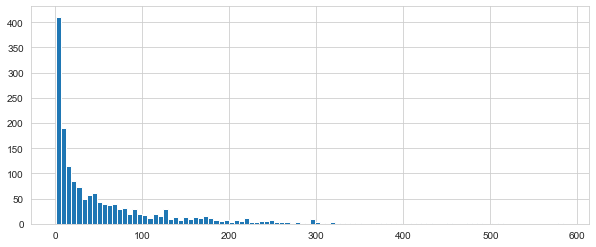

In [44]:
plt.figure(figsize=(10,4))
average_rating['Number of times rated'].hist(bins=100)

<AxesSubplot:>

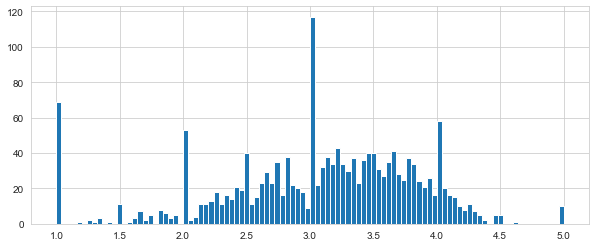

In [45]:
plt.figure(figsize=(10,4))
average_rating['rating'].hist(bins=100)

In [46]:
#most movies are rated around 2.5 - 4.0
# This follows the normal distribution curve, known as Bell curve.

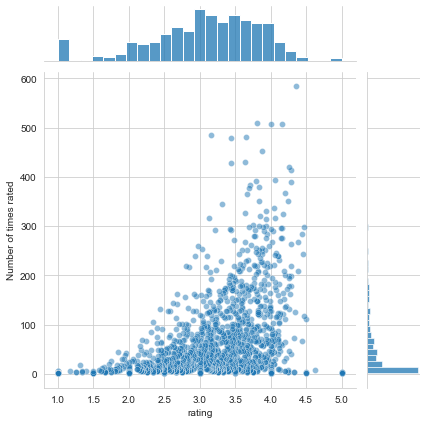

In [47]:
sns.jointplot(x = 'rating' , y='Number of times rated', data = average_rating, alpha = 0.5)

In [15]:
# Jointplot - the tenser points indicate where the number of ratings are mostly given 

In [48]:
# Creating matrix for the recommender

In [49]:
movie_matrix = df.pivot_table(index = 'userId', columns = 'title', values = 'rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
userId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# sort data according to the most rated movies, in descending order
# to find the most rated movies.

In [54]:
average_rating.sort_values('Number of times rated', ascending = False).head(10)

,rating,Number of times rated
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [53]:
average_rating.head()

,rating,Number of times rated
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3


In [ ]:
#IDD - independence day(ID4)

In [57]:
fargo_ratings = movie_matrix['Fargo (1996)']
IDD_ratings = movie_matrix['Independence Day (ID4) (1996)']

In [59]:
corr_to_fargo = movie_matrix.corrwith(fargo_ratings)
corr_to_IDD = movie_matrix.corrwith(IDD_ratings)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [64]:
correlation_to_fargo = pd.DataFrame(corr_to_fargo, columns = ['Similarity'])
correlation_to_fargo.dropna(inplace=True)
correlation_to_fargo.head()

,Similarity
title,
'Til There Was You (1997),0.100000
1-900 (1994),0.866025
101 Dalmatians (1996),-0.245368
12 Angry Men (1957),0.098676
187 (1997),0.142509


In [62]:
correlation_to_fargo.sort_values('Similarity', ascending=False).head(20)

,Similarity
title,
Open Season (1996),1.0
Maya Lin: A Strong Clear Vision (1994),1.0
Captives (1994),1.0
City of Industry (1997),1.0
"Convent, The (Convento, O) (1995)",1.0
Fargo (1996),1.0
"Smile Like Yours, A (1997)",1.0
"Journey of August King, The (1995)",1.0
King of the Hill (1993),1.0


In [67]:
correlation_to_fargo = correlation_to_fargo.join(average_rating['Number of times rated'])
correlation_to_fargo.head()

,Similarity,Number of times rated
title,,
'Til There Was You (1997),0.100000,9
1-900 (1994),0.866025,5
101 Dalmatians (1996),-0.245368,109
12 Angry Men (1957),0.098676,125
187 (1997),0.142509,41
